## A Hands-on Introduction to Data Manipulation using Pandas  

#### Instructor: Aashita Kesarwani

In this exercise session, we will explore the [Titanic dataset from Kaggle](https://www.kaggle.com/c/titanic).  
Goal of the competition: To apply the tools of machine learning to predict which passengers survived the Titanic tragedy.
    
### Today's session
Topics to be covered today:  
- Pandas dataframes as the data structure for datasets
- Converting csv files to dataframes 
- Slicing and indexing dataframes using conditionals as well as iloc and loc methods.
- Statistical summary and exploration of dataframes
- Detecting and filling missing values in the dataframes 
- Regular expressions for data extraction
- Feature engineering such as creating new features 
- Basic plots
- Basic operations such as dropping rows/columns, setting index, replacing values of a column using a dictionary, etc.
- Split-apply-combine operations by grouping rows of a dataframe
- Encoding categorical variables
- Correlation among features (optional)
- Merging dataframes (optional)

First we import the relevant python modules:

In [2]:
import numpy as np
import pandas as pd

# The following two modules matplotlib and seaborn are for plots
import matplotlib.pyplot as plt
import seaborn as sns # Comment this if seaborn is not installed
%matplotlib inline

# The module re is for regular expressions
import re

Pandas: an excellent tool to work with datasets

Dataframes: the central data structure of pandas library
- Evolved out of tables
- Most suitable for data manipulation tasks  

Pandas is built on top of numpy. The crucial difference between numpy matrices and pandas Dataframes is that the columns in a Dataframe can be of different datatypes such as numerical, categorical, textual, etc.

First we load the [Titanic dataset from Kaggle](https://www.kaggle.com/c/titanic) stored in the `csv` file as a dataframe using [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function.

In [14]:
path = 'titanic/'
df = pd.read_csv(path + 'train.csv')

In [ ]:
# df

As it turns out to be rather big dataset to display, we can comment the above cell by adding # in front of df and run it again to get rid of the output.

Next, let's check the numbers of rows and columns in the dataset.

In [15]:
df.shape

(891, 12)

So, the dataset consists of 891 rows and 15 columns.

We use `head()` function to peek into the first 5 rows (or any number of rows by using `head(n)`).

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


[Description for the columns](https://www.kaggle.com/c/titanic/data) is as follows.  

|Variable|	Definition|	Key|   
|:---  |:--- |:---|
|PassengerId| Passenger ID |
|Survived| 	Survival|	0 = No, 1 = Yes |
|Pclass	|Ticket class|	1 = 1st, 2 = 2nd, 3 = 3rd|
|Sex	|Sex|	
|Age	|Age in years	|
|SibSp	|# of siblings / spouses aboard the Titanic	|
|Parch	|# of parents / children aboard the Titanic	|
|Ticket	|Ticket number	|
|Fare	|Passenger fare	|
|Cabin	|Cabin number	|
|Embarked	|Port of Embarkation	|C = Cherbourg, Q = Queenstown, S = Southampton|

* What are the features?

The final goal is to design a model to predict whether a passenger survives or not, which of the above features seem like important predictors? How can you analyse the data in view of this objective?

* What is feature engineering?
    * Missing values
    * Encoding categorial features
    * Creating new features from the existing ones using tools such as regular expressions, split-apply-combine operations on rows, etc.

### 1. Selecting rows and columns from the dataframe

How do we select a column from the dataframe? Say, we want to select the *Name* column from the dataframe. 

Remember, we used square brackets for indexing lists, strings and numpy arrays in Python, for example `A[0]`.

In [24]:
df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [19]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Since we do not want all the rows in the output, we have used `head()` function at the end.

How do we select multiple columns? Suppose we want to select the columns *Name, Sex* and *Age* from the dataframe. Hint: Use a list of columns inside the square brackets.

In [26]:
df[['Name', 'Sex', 'Age']]

,Name,Sex,Age
0,"Braund, Mr. Owen Harris",male,22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,"Heikkinen, Miss. Laina",female,26.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,"Allen, Mr. William Henry",male,35.0
5,"Moran, Mr. James",male,NaN
6,"McCarthy, Mr. Timothy J",male,54.0
7,"Palsson, Master. Gosta Leonard",male,2.0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0
9,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0


We can also select rows by putting a certain condition on a column. Say, we want only those rows for which the gender is *'female'*. 

In [32]:
df[df["Sex"] == "female"].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


Now, we want to retrieve only the female passengers in the traveling in the first class. 
Hint: Add another conditional `df['Pclass']==1` to the above code using & and make sure to wrap the two conditionals with parenthesis.

In [44]:
df[(df["Sex"] == "female") & (df['Pclass']==1)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


We can also get the number of passengers using the shape method which gives us both the number of columns and the number of rows. Write the code to count the number of female passengers in the traveling in the first class. 

In [38]:
df[(df["Sex"] == "female") & (df['Pclass']==1)].shape[0]

94

#### The `loc` and `iloc` methods
So far, we have seen how to retrieve either some select columns or certain rows based on conditionals. What if we want to slice off a portion of the dataframe with some specific rows and columns? We use `.loc[]` or `.iloc[]` methods for this purpose. 
* `.iloc[]` method is primarily integer position based and gets rows/columns at particular positions in the index (so it only takes integers). 
* `loc[]` method is label based and gets rows/columns with particular labels from the index.

The `loc[]` method allows us to put conditions on rows and retrieve select columns simultaneously.

For example, we want to get the name and the survival information for all the adults above 70 years.

In [42]:
df.loc[df['Age']>70, ['Name', 'Survived']]

,Name,Survived
96,"Goldschmidt, Mr. George B",0
116,"Connors, Mr. Patrick",0
493,"Artagaveytia, Mr. Ramon",0
630,"Barkworth, Mr. Algernon Henry Wilson",1
851,"Svensson, Mr. Johan",0


,Name,Survived
96,"Goldschmidt, Mr. George B",0
116,"Connors, Mr. Patrick",0
493,"Artagaveytia, Mr. Ramon",0
630,"Barkworth, Mr. Algernon Henry Wilson",1
851,"Svensson, Mr. Johan",0


Write the code to retrieve the **name, age and survival** information for all the **female passengers traveling in the first class**. 

In [43]:
df.loc[(df["Sex"] == "female") & (df['Pclass']==1), ['Name', 'Age', 'Survived']]

,Name,Age,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1
11,"Bonnell, Miss. Elizabeth",58.0,1
31,"Spencer, Mrs. William Augustus (Marie Eugenie)",NaN,1
52,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",49.0,1
61,"Icard, Miss. Amelie",38.0,1
88,"Fortune, Miss. Mabel Helen",23.0,1
136,"Newsom, Miss. Helen Monypeny",19.0,1
151,"Pears, Mrs. Thomas (Edith Wearne)",22.0,1
166,"Chibnall, Mrs. (Edith Martha Bowerman)",NaN,1


The `iloc[]` method let us retrieve rows by passing sequence of indexes. For example, we can select the rows numbered 100th to 105th. The indexing works exactly like python lists and numpy arrays.

In [45]:
df.iloc[100:106]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
100,101,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,NaN,S
101,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
102,103,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S
103,104,0,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S
104,105,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
105,106,0,3,"Mionoff, Mr. Stoytcho",male,28.0,0,0,349207,7.8958,NaN,S


Write the code to retrieve every 100th row from the dataframe.

In [46]:
df.iloc[::100]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
100,101,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,NaN,S
200,201,0,3,"Vande Walle, Mr. Nestor Cyriel",male,28.0,0,0,345770,9.5000,NaN,S
300,301,1,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,NaN,0,0,9234,7.7500,NaN,Q
400,401,1,3,"Niskanen, Mr. Juha",male,39.0,0,0,STON/O 2. 3101289,7.9250,NaN,S
500,501,0,3,"Calic, Mr. Petar",male,17.0,0,0,315086,8.6625,NaN,S
600,601,1,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,243847,27.0000,NaN,S
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C
800,801,0,2,"Ponesell, Mr. Martin",male,34.0,0,0,250647,13.0000,NaN,S


## Instructions for the exercise session:
- There are two exercise sessions (section 2 and 3) below, the estimated time for which is 25 minutes each.
- The exercises involves new concepts not covered in the guided session. Please feel free to ask questions and take help from the instructor and/or TAs.
- The hints are provided for the exercises below. The inbuilt functions to be used are provided with a clickable link to the user manual. 
- The exercise session is time-bound and you are encouraged to work in groups to speed things up!

### 2. Exploring the dataset (25 min)

Use [`describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) function for numerical features (columns) to get a brief overview of the statistics of the data.

In [47]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Do the same as above for qualitative (non-numerical) features. Hint: Use `include='O'` parameter in the [`describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) function.

In [48]:
df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Moss, Mr. Albert Johan",male,1601,G6,S
freq,1,577,7,4,644


 Use the built-in pandas function to count the number of surviving and non-surviving passengers. Hint: Use [`value_counts()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) on the column `df['Survived']`.

In [49]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Below is a pie chart of the same using `matplotlib`:

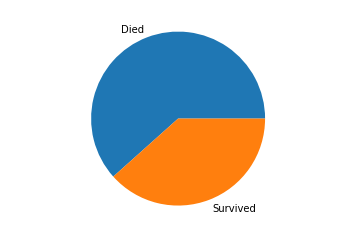

In [7]:
plt.axis('equal') 
plt.pie(df['Survived'].value_counts(), labels=('Died', "Survived"));

Below is a bar chart for the survival rate among male and female passengers using `seaborn`. Here is [Seaborn cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf).

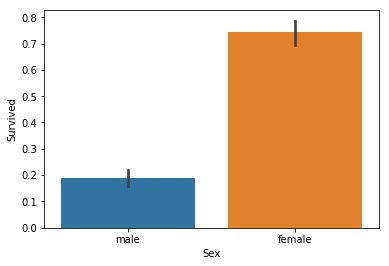

In [8]:
sns.barplot(x = 'Sex', y = 'Survived', data = df);

Plot the survival rate among passengers in each ticket class.

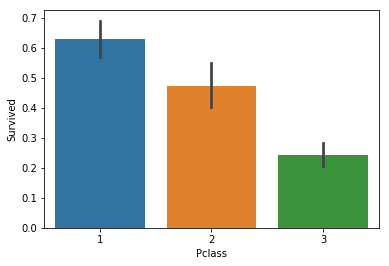

We can also check the survival rate among both genders within the three ticket classes as follows.

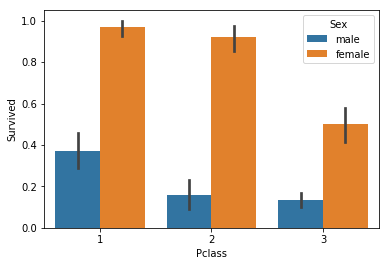

In [9]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df);

From the above chart, do you think that the gender affect the chance of survival for all the three ticket classes equally? Or does it seem like gender's effect is more pronounced for a certain ticket class passengers than others? We plot the  point estimates and confidence intervals for each sub-category to see it more clearly.

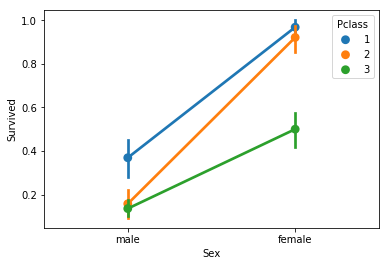

In [10]:
sns.pointplot(x='Sex', y='Survived', hue='Pclass', data=df);

Notice the steeper slope for the second class.

It seems that gender and ticket class put together give more information about the survival chance than both of them separately. Please feel free to later explore other variables and combination of variables in depth in your own time.

How many children were on board? Hint: Use indexing on rows using conditional on the *Age* column and then the [`shape`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html) method to count the rows as seen above.

How many of the children on board survived? Hint: Add another conditional for the *Survived* column to the above code.

Use the functions [`isnull()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html) and [`sum()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html) on the dataframe to find out the number of missing values in each column.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Detecting missing values is an important first step in Feature Engineering, that is preparing the features (independent variables) to use for building the machine learning models. The next step is to handle those missing values. Depending on the data, sometimes it is a good idea to drop the rows or columns that have some or a lot of missing values, but that also means discarding relevant information. Another way to handle missing values is to fill them with something appropriate. 

1. Discuss the pros and cons of dropping the rows and/or columns with missing values in general. Should you drop none, all or some of the columns for this particular dataset in view of building the predictive model? Same question for dropping the rows with missing values.
3. If you consider filling the missing values, what are the possible options? Can you make use of other values in that column to fill the missing values? Can you make use of other values in that row as well as values in that column to fill the missing values 
4. Can the title in the name column be used for guessing a passengers' age based on the age values of other passengers with the same title?

What is the most common port of embarkment? Hint: Check the frequency (counts) of each value in the Embarked column using the built-in function [`value_counts()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) as seen above. 

As we saw above, there are missing values in the column for *Embarked*. Fill them with the most commonly occuring value. Hint: Use [`fillna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html).

Let us check whether the missing values for the *Embarked* column is indeed filled.

In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

If not, there are two options to fix this. One is to set `inplace` parameter in the `set_index()` function as `True` and another is to use assignment operator `=` as in `df = df.function()`. 

***Question***: Why is the `inplace` keyword False by default? This is true not just for `set_index()` but for most built-in functions in pandas. 

Answer: To facilitate method chaining or piping i.e. invoking multiple operations one after the other. For example, `df.isnull().sum()` used above. Chaining is more commonly used in pandas as compared to another programming style i.e. using nested function calls. Please read more [here](https://towardsdatascience.com/the-unreasonable-effectiveness-of-method-chaining-in-pandas-15c2109e3c69), if interested.

We should remove the *Cabin* column from the DataFrame-- too many values are missing. Hint: Use [`drop()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html) with appropriate value for the `axis` keyword. 

Let us check whether the column is indeed dropped. If not, modify the code above accordingly.

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


What is the age of the oldest person on board? 

Find all the passenger information for the oldest person on board. Hint: Use [`loc[]`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html) method with [`idxmax()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmax.html) for the Age column.

### 3. Feature Engineering: Creating a new column for the titles of the passengers (25 min)

Now, we are going to create a new feature (column) for titles of the passengers. For that, let us first take at the passengers' names. 

In [22]:
df.loc[:20, 'Name'].values

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J'], dtype=object)

We notice one of the identifying characteristics of the titles above are that they end with a period. Regular expressions are very useful in the process of data extraction and we will use them using the python module `re` to extract the titles from the *Name* column. We will use regular expressions characters to construct a pattern and then use built-in function `findall` for pattern matching.

Some useful regular expression characters:
- `\w`: pattern must contain a word character, such as letters.
- `[ ]`: pattern must contain one of the characters inside the square brackets. If there is only one character inside the square brackets, for example `[.]`, then the pattern must contain it.

Let's try this.

In [23]:
re.findall("\w\w[.]", 'Braund, Mr. Owen Harris')

['Mr.']

It worked! It returned a list instead of the string, so we use indexing to get the first element of the list.

In [24]:
re.findall("\w\w[.]", 'Braund, Mr. Owen Harris')[0]

'Mr.'

Let us try it on another name:

In [25]:
re.findall("\w\w[.]", 'Heikkinen, Miss. Laina')[0]

'ss.'

So, we want a pattern that automatically detects the length of the title and returns the entire title.

For regular expressions, \+ is added to a character/pattern to denote it is present one or more times. For example, `\w+` is used to denote one or more word characters. Fill in the regular expression in the below cell that will detect a period preceeded by one or more word characters.

In [26]:
# Fill in below:
re.findall("FILL IN HERE", 'Heikkinen, Miss. Laina')[0]

IndexError: list index out of range

The output should be `'Miss.'`

Summary: For pattern matching the titles using regular expressions:
- First we make sure it contains a period by using `[.]`. 
- Secondly, the period must be preceeded by word characters (one or more), so we use `\w+[.]`.

Write a function `get_title` that takes a name, extracts the title from it and returns the title.

In [50]:
# def get_title(name):
#     title = re.findall("\w+[.]", name)[0]
#     return title

Check that the function is working properly by running the following two cells.

In [ ]:
get_title('Futrelle, Mrs. Jacques Heath (Lily May Peel)')

The output should be `'Mrs.'`. Note: Make sure that the funtion returns a string and not a list. Please modify the above function accordingly.

In [ ]:
get_title('Simonius-Blumer, Col. Oberst Alfons')

The output should be `'Col.'`.

Create a new column named Title and extract titles from the Name column using the above function `get_title`. Hint: Use built-in [`map()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html) function. The syntax is `df['New_column'] = df['Relevant_column'].map(function_name)`.

In [51]:
df['Title'] = df['Name'].map(get_title)

Let us peek into the dataframe.

In [ ]:
df.head()

List all the unique values for the titles along with their frequency. Hint: Use an inbuilt pandas function

Now, we want to replace the various spellings of the same title to a single one. Hint: Use the below dictionary with the [`replace`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html) function

`title_dictionary = {'Ms.': 'Miss.', 'Mlle.': 'Miss.', 
              'Dr.': 'Rare', 'Mme.': 'Mr.', 
              'Major.': 'Rare', 'Lady.': 'Rare', 
              'Sir.': 'Rare', 'Col.': 'Rare', 
              'Capt.': 'Rare', 'Countess.': 'Rare', 
              'Jonkheer.': 'Rare', 'Dona.': 'Rare', 
              'Don.': 'Rare', 'Rev.': 'Rare'}`

In [53]:
title_dictionary = {'Ms.': 'Miss.', 'Mlle.': 'Miss.', 
              'Dr.': 'Rare', 'Mme.': 'Mr.', 
              'Major.': 'Rare', 'Lady.': 'Rare', 
              'Sir.': 'Rare', 'Col.': 'Rare', 
              'Capt.': 'Rare', 'Countess.': 'Rare', 
              'Jonkheer.': 'Rare', 'Dona.': 'Rare', 
              'Don.': 'Rare', 'Rev.': 'Rare'} 

df['Title'] = df['Title'].replace(title_dictionary)
# Another option
# df['Title'].replace(title_dictionary, inplace=True)

List all the unique values for the titles along with their frequency to check that the titles are replaced properly.

What is the median age of passengers? Hint: Use the inbuilt function [`median`](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.median.html).

What is the median age of passengers with the title 'Miss.'? Hint: Use [`loc[]`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html) method for slicing off the select rows and the *Age* column.

What is the median age of passengers with the title 'Mrs.'?

Is there a noticeble difference in the median ages for the passengers with the above two titles? Should we take titles into account while filling the missing values for the *Age* column? If yes, how?

This is the end of the exercise session and the following code is part of the guided session. If you finished this and the above section earlier than the alloted time, please skip the following two sections for now to go directly to the [section 7](#section7) on merging dataframes.

### 4. [GroupBy object](https://pandas.pydata.org/pandas-docs/version/0.22/groupby.html)

So far, we have created a new column *Title* that is derived from the column *Name* using regular expressions. As we saw earlier, the column *Age* has a lot of missing values. It can be filled with the median (or mean) age of all passengers, but we can also make use of the newly derived *Title* column to fill the age based on the title of the passenger. For this, it would be helpful to group the passengers based on their title to get the median age for each group and then fill the missing age values for passengers with the median age for their title.

We can use [`groupby()`](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.groupby.html) to group the rows of the dataframe based on a column(s), say *Title*.

In [58]:
df.groupby('Title')

The resulting object is not a dataframe but there are multiple ways to derive a dataframe from the grouped object.

One of the ways to derive a dataframe from a groupby object is by aggregation, that is computing a summary statistic (or statistics) about each group. For example, we can get the median values for the columns in each group of titles.

In [59]:
df.groupby('Title').median()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Port_C,Port_Q,Port_S
Title,,,,,,,,,,,
Master.,345.0,1.0,3.0,0.0,3.5,1.0,1.0,29.06250,0,0,1
Miss.,388.0,1.0,3.0,1.0,21.0,0.0,0.0,15.74170,0,0,1
Mr.,465.5,0.0,3.0,0.0,30.0,0.0,0.0,9.41665,0,0,1
Mrs.,438.0,1.0,2.0,1.0,35.0,1.0,0.0,26.00000,0,0,1
Rare,627.0,0.0,1.0,0.0,48.5,0.0,0.0,27.72080,0,0,1


The median age vary greatly for each group ranging from 3.5 to 48 years.

In [60]:
df.groupby('Title').mean()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Port_C,Port_Q,Port_S
Title,,,,,,,,,,,
Master.,414.975000,0.575000,2.625000,0.000000,4.574167,2.300000,1.375000,34.703125,0.125000,0.100000,0.775000
Miss.,411.967568,0.702703,2.291892,1.000000,21.845638,0.702703,0.540541,43.800092,0.216216,0.178378,0.600000
Mr.,454.335907,0.158301,2.407336,0.001931,32.347118,0.287645,0.152510,24.528159,0.166023,0.067568,0.766409
Mrs.,453.160000,0.792000,2.000000,1.000000,35.898148,0.696000,0.832000,45.138533,0.248000,0.024000,0.720000
Rare,547.043478,0.347826,1.347826,0.130435,45.545455,0.347826,0.086957,37.169748,0.260870,0.086957,0.652174


The most common way to derive a dataframe from a groupby object is by transformation. We create a new column *MedianAge* which consists of the groupwise median age depending on the passengers' title using [`transform()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html).

In [61]:
df['MedianAge'] = df.groupby('Title')['Age'].transform("median")
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Port_C,Port_Q,Port_S,MedianAge
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,0,0,1,30.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,1,0,0,35.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,0,0,1,21.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs.,0,0,1,35.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr.,0,0,1,30.0
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q,Mr.,0,1,0,30.0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S,Mr.,0,0,1,30.0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S,Master.,0,0,1,3.5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S,Mrs.,0,0,1,35.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C,Mrs.,1,0,0,35.0


Now we fill in the missing values in the *Age* column using the values in the *MedianAge* column.

In [62]:
df['Age'] = df['Age'].fillna(df['MedianAge'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Port_C,Port_Q,Port_S,MedianAge
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,0,0,1,30.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,1,0,0,35.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,0,0,1,21.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs.,0,0,1,35.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr.,0,0,1,30.0


We drop off the *MedianAge* column since we no longer need it and then check for the missing values.

In [63]:
df = df.drop('MedianAge', axis=1)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
Port_C           0
Port_Q           0
Port_S           0
dtype: int64

There are no missing values in the Age column!

### 5. Encoding categorical variables

Let us check the datatype of each column. Hint: Use [`dtypes`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html).

We convert the gender values to numerical values 0 and 1 using [`replace`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html) with a suitable dictionary. 

In [54]:
df = df.replace({'male': 0, 'female': 1})
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Title           object
dtype: object

What can go wrong with randomly assigning numbers to categories?

There are two kinds of categorical variables - ordinal and inordinal based on whether the categories possess an inherent order or not.

For example, passengers' ticket class `Pclass` is ordinal whereas gender is inordinal.

Numbers have a natural order and so do ordinal categories. Number also possess certain other characteristics that ordinal categories do not. For example, the difference between the numbers 1 and 2 is the same as the difference between the numbers 2 and 3 but the same cannot be said for ordinal categories. 
$$ 2-1 == 3-2$$
So, converting categories to numbers means adding untrue assumptions that may or may not adversely affect our model. 

For this reason, the prefered method is one-hot encoding. In this method, we build a one-hot encoded vector with dimension equal to the number of classes in the categories. This vector consists of all 0's except for a 1 corresponding to the class of the instance. For example, the *Embarked* column will have one-hot encoded vectors of [1,0,0], [0,1,0] and [0,0,1] for the three ports. This means that we will have three columns for the *Embarked* columns - one for each port and the values for these columns would simply be 1 or 0.

One-hot encoding is accomplished in pandas using [`get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) as given below. It simply creates a column for each class of a categorical variable.

In [55]:
pd.get_dummies(df['Embarked']).head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


We want the column names to be `'Port_C', 'Port_Q', 'Port_S'`, so we make use of the [`prefix` ](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) keyword in `get_dummies` to alter the column names. We save the one-hot encoded vectors to a new dataframe named `port_df`.

In [56]:
port_df = pd.get_dummies(df['Embarked'], prefix='Port')
port_df.head()

,Port_C,Port_Q,Port_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


Next, we concat the two dataframes using [`concat`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html).

In [57]:
df = pd.concat([df, port_df], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Port_C,Port_Q,Port_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs.,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr.,0,0,1


Notes:
- One of the columns in the one-hot encoding obtained in the above manner is always redundant. In case of features with just two classes such as gender in our dataset, one-hot encoding is not truly useful. One of its column is same as what we obtained by simply replacing classes with 0 and 1 and the other is redundant.  
- The main disadvantage of using one-hot encoding is the increase in the number of features that can negatively affect our model which we will discuss in the later sessions.

### 6. Correlation between variables (Optional)

What are the possible ways to understand the correlation of features with survival? Does correlation always implies causation?

Pearson correlation coefficients measures the linear correlation between the variables.

$$\rho_{X,Y} = \frac{cov(X, Y)}{\sigma_X, \sigma_Y}$$
where 
- $cov(X, Y)$ is the covariance.    
- $\sigma_X, \sigma_Y$ are standard deviations of $X$ and $Y$ respectively.

The correlation between two variables ranges from -1 to 1. The closer in absolute value a correlation is to 1, the more dependent two features are each other.

We can get the correlation matrix for the variables (columns) in the dataset using the built-in function `corr()`.

In [64]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Port_C,Port_Q,Port_S
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.043096,-0.057527,-0.001652,0.012658,-0.001205,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.078931,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.354189,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.081720
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.104921,0.114631,0.245489,0.182333,0.082853,0.074115,-0.125722
Age,0.043096,-0.078931,-0.354189,-0.104921,1.000000,-0.265621,-0.188159,0.097947,0.041433,-0.062868,-0.004535
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.265621,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,0.245489,-0.188159,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.063036
Fare,0.012658,0.257307,-0.549500,0.182333,0.097947,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.166603
Port_C,-0.001205,0.168240,-0.243292,0.082853,0.041433,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.778359
Port_Q,-0.033606,0.003650,0.221009,0.074115,-0.062868,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.496624


* From the above matrix, note which feature has the highest correlation with the survival. 
* Do features have high correlation among themselves? 
* Note that this matrix has excluded some categorical variables like gender, port of embarkment, etc. 

The correlation matrix can also be visualized using heatmaps as shown below.

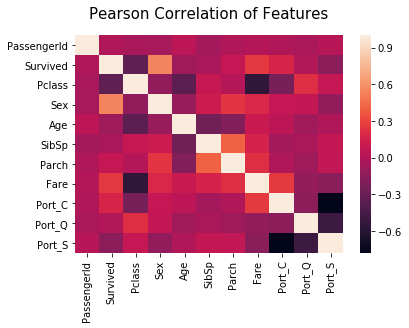

In [65]:
correlation_matrix = df.corr();
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(correlation_matrix);

### 7. Merging columns from different datasets (Optional) <a name="section7"></a>:
A simple illustration to merge two datasets using [`merge()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html).

In [ ]:
df1 = pd.DataFrame({'CourseCode': ['PHYS024', 'CSCI35', 'ENGR156'], 
                   'CourseName': ['Mechanics and Wave Motion', 
                                  'Computer Science for Insight',
                                 'Intro to Comm & Info Theory']})

df2 = pd.DataFrame({'Professor': ['Zachary Dodds', 'Vatche Sahakian', 
                                  'Timothy Tsai', 'Brian Shuve'],
                    'CourseCode': ['CSCI35', 'PHYS024',  'ENGR156', 'PHYS024']})

df1.head()

In [ ]:
df2.head()

In [ ]:
pd.merge(df2, df1)

Please refer to the documents [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) and [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) to better grasp how and when to use `merge()` function. 

#### Merging dataframes from [Instacart Market Basket Analysis](https://www.kaggle.com/c/instacart-market-basket-analysis/data) dataset:
We load the four files into separate dataframes:   
`aisles.csv`   
`departments.csv`  
`products.csv`  
`order_products__train.csv`

In [3]:
path = 'instacart-market-basket-analysis/'
dfa = pd.read_csv(path + 'aisles.csv')
dfd = pd.read_csv(path + 'departments.csv')
dfp = pd.read_csv(path + 'products.csv')
dfo = pd.read_csv(path + 'order_products__train.csv')

Familiarize yourself with the dataframes. Hint: Use [`head()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html).  
Note: You might want to add code cells. Please ask for help unless you already know how to add a code cell.

**Goal: Get a dataframe consisting of the name of the products along with their aisle names and department names for the order with `order_id` equal to 1.**  
This dataframe must have ***8 rows and only three columns:
```'product_name', 'aisle', 'department'```***

First slice out 8 rows from the order_products dataframe that corresponds with `order_id` equal to 1 and save it in a new dataframe `df`. Hint: Use conditional on indexing as seen above.

Let us have a peek into the dataframe `df`.

In [5]:
df

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1


The dataframe `df` has a column named `product_id`. So, we can merge it with the dataframe `dfp` to get `product_name`.

In [6]:
dfp.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


Merge the dataframes `df` and `dfp` using [`merge()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) and save the result back to `df`.

Let us check whether the new columns are added to the dataframe `df`.

In [10]:
df

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16
2,1,10246,3,0,Organic Celery Hearts,83,4
3,1,49683,4,0,Cucumber Kirby,83,4
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15
5,1,13176,6,0,Bag of Organic Bananas,24,4
6,1,47209,7,0,Organic Hass Avocado,24,4
7,1,22035,8,1,Organic Whole String Cheese,21,16


Now, we have new columns `aisle_id` and `department_id`. Let us first merge `dfa` with this dataframe to get the column `aisle`.

Let us check our dataframe `df` again.

In [12]:
df

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses
2,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables
3,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood
5,1,13176,6,0,Bag of Organic Bananas,24,4,fresh fruits
6,1,47209,7,0,Organic Hass Avocado,24,4,fresh fruits
7,1,22035,8,1,Organic Whole String Cheese,21,16,packaged cheese


Now it should have the column `aisle`. Let us now merge `dfd` with this dataframe to get the column `department`.

Let us check our dataframe `df` again.

In [12]:
df

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses
2,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables
3,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood
5,1,13176,6,0,Bag of Organic Bananas,24,4,fresh fruits
6,1,47209,7,0,Organic Hass Avocado,24,4,fresh fruits
7,1,22035,8,1,Organic Whole String Cheese,21,16,packaged cheese


Finally, we only select 3 columns: `'product_name', 'aisle', 'department'`. Hint: Use indexing with the list of columns as seen above.

Let us check the dataframe `df`.

In [ ]:
df

Let us also check the shape of the dataframe `df`.

In [ ]:
df.shape

The output should be `(8, 3)`. Please check your code above if you get something else.

### 8. Feature engineering on the Titanic dataset to create a new column for group size (Optional home work exercise)

In this exercise, we are going to create a new column called `GroupSize` to get the size of the group for each passenger. We consider groups to be either family members or those traveling on the same ticket. This feature is derived using three columns *SibSp*, *Parch* and *Ticket*. 

[Notes](https://www.kaggle.com/c/titanic/data) for the two features *SibSp* and *Parch* are as follows.

> SibSp: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)
> 
> Parch: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.

Create a new column named *Family* by adding the columns *SibSp* and *Parch* and then add 1 to it. Hint: Use `df["New_column"] = df["column_1"] + df["column_2"] + 1`.

Now we check the survival rates with respect to the family size.

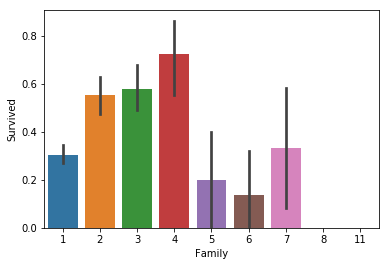

In [15]:
sns.barplot(x='Family', y='Survived', data=df);

Some passengers that appear to be traveling alone by account of their family size were part of a group traveling on the same ticket. To see this, get all the passengers traveling on the ticket "1601" (there are 7 of them).

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S,1
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S,1
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S,1
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S,1
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S,1
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S,1
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S,1


One can check that there are many tickets shared among passengers that may or may not be family members.

In [17]:
df['Ticket'].value_counts()[:15]

347082          7
1601            7
CA. 2343        7
CA 2144         6
3101295         6
347088          6
382652          5
S.O.C. 14879    5
347077          4
4133            4
113760          4
113781          4
17421           4
LINE            4
2666            4
Name: Ticket, dtype: int64

Create a new column named *TicketCount* that counts the total number of passengers traveling in each passengers' ticket.

Hint: 
- First group passengers based on their tickets using `groupby()` on the *Ticket* column.
- For the grouped object, pick any column that has no missing values.
- Use `transform()` for this unique identifier column with the function `"count"` to create a new column *TicketCount*.

For example, we created *MedianAge* using the following code:   
```df['MedianAge'] = df.groupby('Title')['Age'].transform("median")```

Let us peek into the dataframe.

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


Plot the survival rates based on the *TicketCount* using [`sns.barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) (see above).

It does seem that the number of co-travelers have an impact on the survival rates.

Create a new column named *GroupSize* by picking the maximum value among the columns *Family* and *TicketCount*.   
Note: We consider groups to be either family members or those traveling on the same ticket.   
Hint: Use built-in `max()` function for pandas on the two relevant columns with the appropriate value for the `axis` parameter. 

Plot the survival rates based on the GroupSize using sns.barplot().

Check the number of rows where Groupsize is not equal to Family. Similarly, check the number of rows where TicketCount is not equal to Family.

In [21]:
df[df['GroupSize'] != df['Family']].shape[0], df[df['GroupSize'] != df['TicketCount']].shape[0]

(97, 191)

The output must be `(97, 191)`. Check your above code, if you get a different output.

#### Acknowledgment:
* [Titanic dataset from Kaggle](https://www.kaggle.com/c/titanic) dataset openly available in Kaggle is used in the exercises.

**Note:**
The solutions for this exercise can be found [here]().